In [2]:
import logging
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from graph import Graph
from mip import MIP_gespp
from aco import ACO_gespp

## Initialize Logging

In [4]:
# Remove all existing handlers from the root logger.
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(logging.root.handlers)


# Configure logging with the generated file name
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filename=f"log_optim.txt",
    filemode="w"
)

## Test Graph class loading and plotting

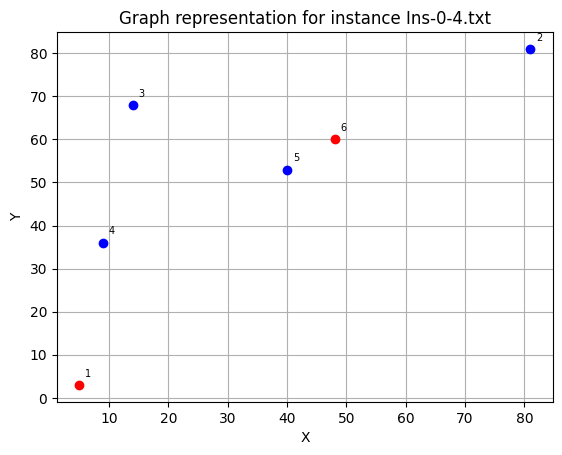

In [5]:
graph = Graph()
# file = "instances/Ins-76-100.txt"
# file = "instances/Ins-35-50.txt"
# file = "instances/Ins-17-20.txt"
file = "instances/Ins-0-4.txt"
nodes_number, clusters_number, padding = graph.load_graph_data(file)

graph.plot_nodes(file, padding)

## Implementation of Lower Bound using IP model

In [6]:
# # List all instance files (for example, with extension .txt)
# instance_files = [os.path.join("instances2", filename) for filename in os.listdir("instances2") if filename.endswith(".txt")]

# # Prepare a list to collect results for summary.
# results_mip_test = []


# for instance_file in instance_files:
#     print(instance_file)
#     instance = Graph()
#     nodes_number, clusters_number, padding = graph.load_graph_data(instance_file)
#     ip_status, ip_cost, ip_path_arcs, ip_total_arc_cost, ip_total_profit, ip_visited_clusters, clusters_coverage = MIP_gespp(graph)
#     results_mip_test.append((instance_file, ip_status, ip_cost, clusters_coverage))

# print(results_mip_test)

# mip_results = pd.DataFrame(results_mip_test, columns =['File', 'IP Status', 'GESPP IP Cost', 'GESPP IP Cluster Coverage'])

# mip_results.to_excel("mip_results.xlsx")

In [7]:
ip_status, ip_cost, ip_path_arcs, ip_total_arc_cost, ip_total_profit, ip_visited_clusters, clusters_coverage = MIP_gespp(graph)

In [8]:
print("IP Result ===>", ip_status, ip_cost)

IP Result ===> Optimal -2475.0


## Implementation of ACO algorithm

### Implementation of Standard ACO model

ACO Path: ['1', '4', '6']
ACO Objective function: -2475

#### ACO Solution details ####

Selected arcs in the solution:
ACO Path cost (only arcs): 7885
ACO Clusters profit recovered: 10360
ACO Clusters usage: 66.67%


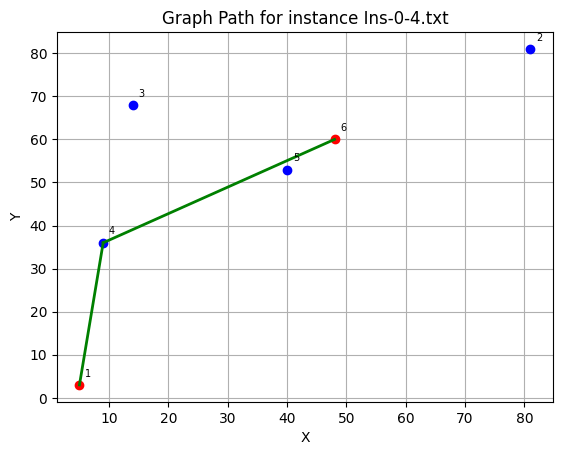

In [9]:

print("==============================================================")

aco_std = ACO_gespp(graph,
              num_ants=60,
              num_iterations=300,
              alpha=3.0,
              beta=2.0,
              evaporation_rate=0.1,
              Q=5,
              maxmin_init_cost=1000,
              tau_min_scaler=10,
              use_maxmin=False)

aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_clusters_coverage_std, aco_progress_std = aco_std.run()


print("ACO Path:", aco_path_std)
print("ACO Objective function:", aco_cost_std)

print("\n#### ACO Solution details ####")
print("\nSelected arcs in the solution:")

print(f"ACO Path cost (only arcs): {aco_arc_cost_std}")  
print(f"ACO Clusters profit recovered: {aco_total_profit_std}")
print(f"ACO Clusters usage: {aco_clusters_coverage_std}%")

graph.plot_path(aco_path_std,file, padding)


#### Test alpha & beta for Standard ACO model

In [10]:
# files_test_param = ["Ins-95-100.txt"]

# alpha_params = [0.5, 1, 3, 10]
# beta_params = [1, 2, 5, 10]
# q_strategy_param = [True, False]
# q_params = [1, 10, 100, 1000]

# dataframe_test_alpha = pd.DataFrame(columns=["alpha_val", "iter", "cost"])
# dataframe_test_beta = pd.DataFrame(columns=["beta_val", "iter", "cost"])
# dataframe_test_qstrat = pd.DataFrame(columns=["q_Strategy", "iter", "cost"])
# dataframe_test_q = pd.DataFrame(columns=["q", "iter", "cost"])

# for instance, file in enumerate(files_test_param):
#     instance = Graph()
#     nodes_number, clusters_number, padding = instance.load_graph_data("./instances/"+file)

#     for alpha in alpha_params:
#         print(f"alpha {alpha}")
#         aco_std = ACO_gespp(instance,
#               num_ants=60,
#               num_iterations=50,
#               alpha=alpha,
#               beta=2,
#               evaporation_rate=0.1,
#               Q=100,
#               maxmin_init_cost=1000,
#               tau_min_scaler=10,
#               use_maxmin=False)
#         aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_visited_clusters_std, aco_progress_std = aco_std.run()
        
#         for iteration, cost in aco_progress_std.items():
#             dataframe_test_alpha.loc[len(dataframe_test_alpha)] = [alpha, iteration, cost]

#     for beta in beta_params:
#         print(f"beta {beta}")
#         aco_std = ACO_gespp(instance,
#             num_ants=60,
#             num_iterations=50,
#             alpha=3,
#             beta=beta,
#             evaporation_rate=0.1,
#             Q=100,
#             maxmin_init_cost=1000,
#             tau_min_scaler=10,
#             use_maxmin=False)
#         aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_visited_clusters_std, aco_progress_std = aco_std.run()
    
#         for iteration, cost in aco_progress_std.items():
#             dataframe_test_beta.loc[len(dataframe_test_beta)] = [beta, iteration, cost]
        
#     for q in q_strategy_param:
#         print(f"Qstrat {q}")
#         aco_std = ACO_gespp(instance,
#             num_ants=60,
#             num_iterations=50,
#             alpha=3,
#             beta=5,
#             evaporation_rate=0.1,
#             Qstrategy=q,
#             Q=100,
#             maxmin_init_cost=1000,
#             tau_min_scaler=10,
#             use_maxmin=False)
#         aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_visited_clusters_std, aco_progress_std = aco_std.run()
    
#         for iteration, cost in aco_progress_std.items():
#             dataframe_test_qstrat.loc[len(dataframe_test_qstrat)] = [q, iteration, cost]

#     for q_val in q_params:
#         print(f"Q {q_val}")
#         aco_std = ACO_gespp(instance,
#             num_ants=60,
#             num_iterations=50,
#             alpha=3,
#             beta=5,
#             evaporation_rate=0.1,
#             Qstrategy=True,
#             Q=q_val,
#             maxmin_init_cost=1000,
#             tau_min_scaler=10,
#             use_maxmin=False)
#         aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_visited_clusters_std, aco_progress_std = aco_std.run()

#         for iteration, cost in aco_progress_std.items():
#             dataframe_test_q.loc[len(dataframe_test_q)] = [q_val, iteration, cost]
        

In [11]:
# dataframe_test_alpha.to_csv("params_alpha_aco_std3.csv")
# dataframe_test_beta.to_csv("params_beta_aco_std3.csv")
# dataframe_test_qstrat.to_csv("params_qstrat_aco_std3.csv")
# dataframe_test_q.to_csv("params_q_aco_std3.csv")
dataframe_test_alpha = pd.read_csv("params_alpha_aco_std3.csv")
dataframe_test_beta = pd.read_csv("params_beta_aco_std3.csv")
dataframe_test_qstrat = pd.read_csv("params_qstrat_aco_std3.csv")
dataframe_test_q = pd.read_csv("params_q_aco_std3.csv")

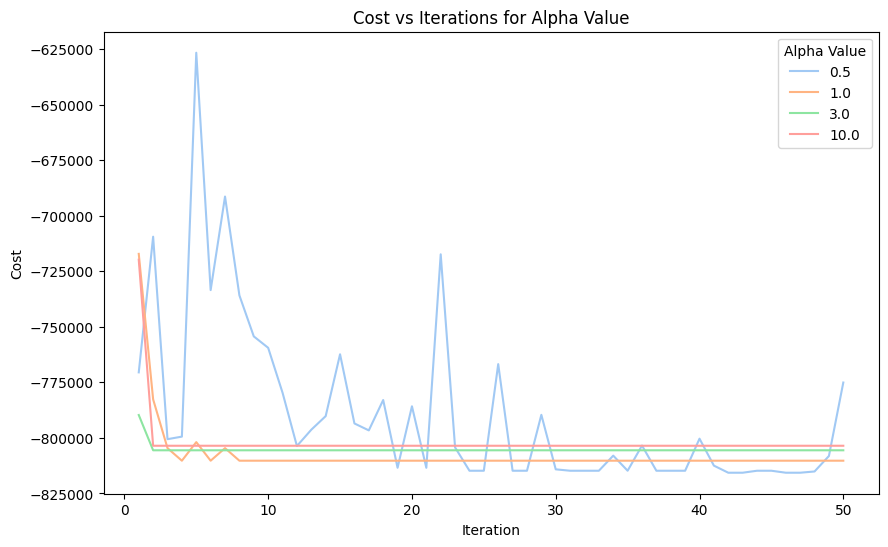

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dataframe_test_alpha, x='iter', y='cost', hue='alpha_val', palette='pastel')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Alpha Value')
plt.legend(title='Alpha Value')
plt.show()

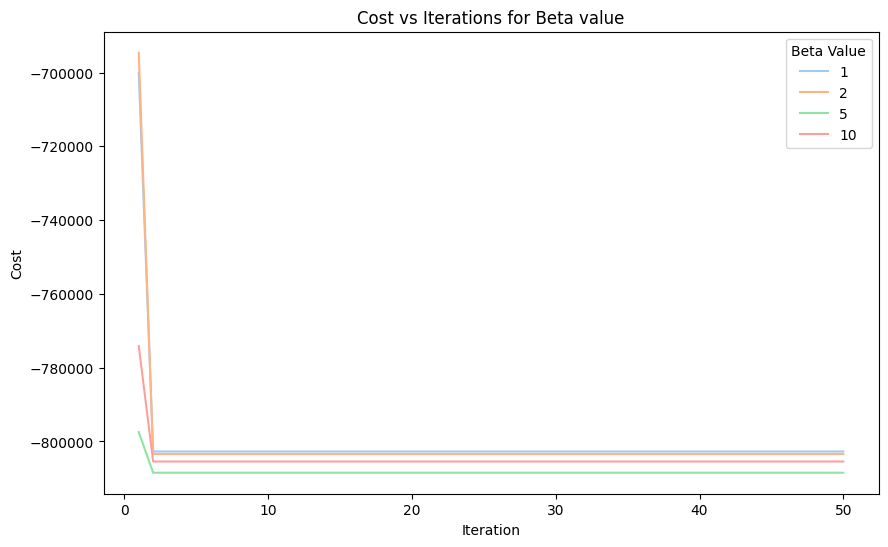

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dataframe_test_beta, x='iter', y='cost', hue='beta_val', palette='pastel')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Beta value')
plt.legend(title='Beta Value')
plt.show()

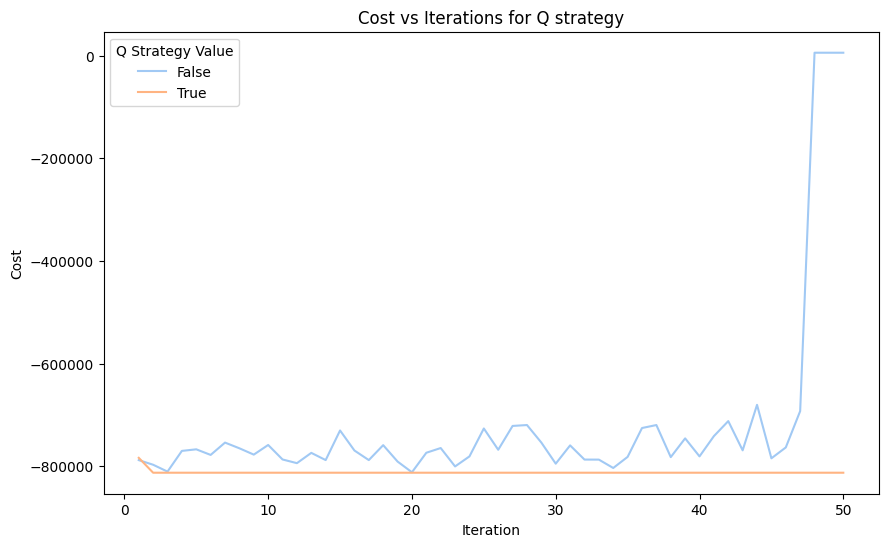

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dataframe_test_qstrat, x='iter', y='cost', hue='q_Strategy', palette='pastel')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Q strategy')
plt.legend(title='Q Strategy Value')
plt.show()

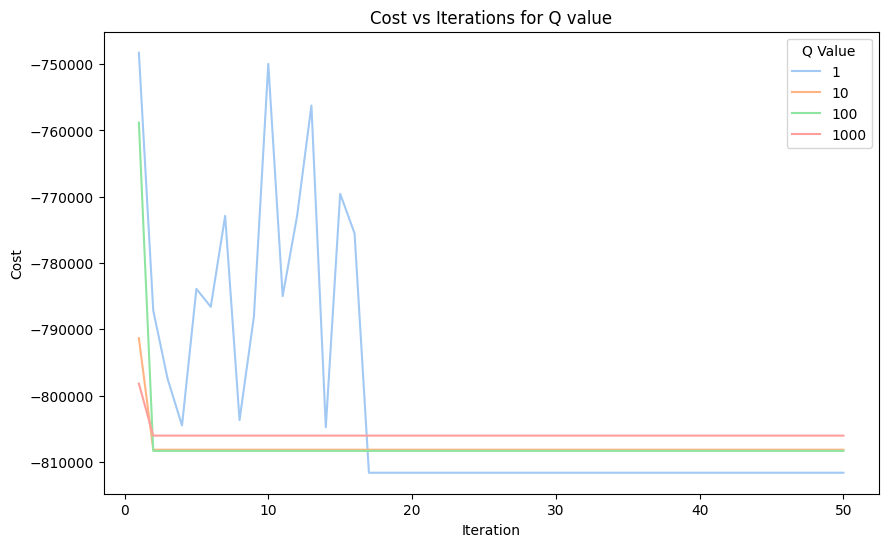

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dataframe_test_q, x='iter', y='cost', hue='q', palette='pastel')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Q value')
plt.legend(title='Q Value')
plt.show()

### Implementation of MAXMIN ACO model

In [16]:

print("==============================================================")

aco_maxmin = ACO_gespp(graph,
              num_ants=60,
              num_iterations=150,
              alpha=3,
              beta=2,
              evaporation_rate=0.1,
              Q=100,
              maxmin_init_cost=5000,
              tau_min_scaler=10,
              use_maxmin=True)

aco_path_maxmin, aco_cost_maxmin, aco_arc_cost_maxmin, aco_total_profit_maxmin, aco_clusters_coverage_maxmin, aco_progress_maxmin = aco_maxmin.run()


print("ACO MAXMIN Path:", aco_path_maxmin)
print("ACO MAXMIN Objective function:", aco_cost_maxmin)

print("\n#### ACO MAXMIN Solution details ####")
print("\nSelected arcs in the solution:")

print(f"ACO MAXMIN Path cost (only arcs): {aco_arc_cost_maxmin}")  
print(f"ACO MAXMIN Clusters profit recovered: {aco_total_profit_maxmin}")
print(f"ACO MAXMIN Clusters usage: {aco_clusters_coverage_maxmin}%")




ACO MAXMIN Path: ['1', '4', '6']
ACO MAXMIN Objective function: -2475

#### ACO MAXMIN Solution details ####

Selected arcs in the solution:
ACO MAXMIN Path cost (only arcs): 7885
ACO MAXMIN Clusters profit recovered: 10360
ACO MAXMIN Clusters usage: 66.67%


### Test peformance and robusteness Std vs MAXMIN

In [17]:
files_test_perf = ["Ins-0-4.txt", "Ins-17-20.txt", "Ins-40-50.txt", "Ins-76-100.txt"] #, "Ins-4-20.txt", "Ins-0-20.txt", "Ins-23-50.txt"
# iterations = 100
# ants = 60
# restarts = 20

# dataframe_test_perf = pd.DataFrame(columns=["instance_id", "algorithm", "restart", "cost", "path"])



# for instance, file in enumerate(files_test_perf):
#         instance = Graph()
#         nodes_number, clusters_number, padding = instance.load_graph_data("./instances/"+file)
#         for restart in range(restarts):
#                 print(f"{file}: {restart}")
#                 # Run with ACO Standard

#                 instance_aco_std = ACO_gespp(instance,
#                         num_ants=ants,
#                         num_iterations=iterations,
#                         alpha=3,
#                         beta=2,
#                         evaporation_rate=0.1,
#                         Q=100,
#                         maxmin_init_cost=1000,
#                         tau_min_scaler=10,
#                         use_maxmin=False)

#                 path_std, cost_std, arc_cost_std, total_profit_std, coverage_std, progress_std = instance_aco_std.run()


#                 dataframe_test_perf.loc[len(dataframe_test_perf)] = [file, "ACO STD" , restart, cost_std, path_std]

#                 # Run with MAXMIN

#                 instance_aco_maxmin = ACO_gespp(instance,
#                         num_ants=ants,
#                         num_iterations=iterations,
#                         alpha=3,
#                         beta=2,
#                         evaporation_rate=0.1,
#                         Q=100,
#                         maxmin_init_cost=1000,
#                         tau_min_scaler=10,
#                         use_maxmin=True)

#                 path_maxmin, cost_maxmin, arc_cost_maxmin, total_profit_maxmin, aco_clusters_coverage_maxmin, aco_progress_maxminn = instance_aco_maxmin.run()
#                 dataframe_test_perf.loc[len(dataframe_test_perf)] = [file, "ACO MAXMIN" , restart, cost_maxmin, path_maxmin]



In [18]:
# dataframe_test_perf.to_excel("perf2.xlsx")
dataframe_test_perf = pd.read_excel("perf2.xlsx")
display(dataframe_test_perf)

,Unnamed: 0,instance_id,algorithm,restart,cost,path
0,0,Ins-0-4.txt,ACO STD,0,4569,"['1', '4', '2', '6']"
1,1,Ins-0-4.txt,ACO MAXMIN,0,3664,"['1', '2', '6']"
2,2,Ins-0-4.txt,ACO STD,1,3664,"['1', '2', '6']"
3,3,Ins-0-4.txt,ACO MAXMIN,1,3664,"['1', '2', '6']"
4,4,Ins-0-4.txt,ACO STD,2,3664,"['1', '2', '6']"
...,...,...,...,...,...,...
155,155,Ins-76-100.txt,ACO MAXMIN,17,-890543,"['001', '038', '100', '082', '093', '069', '00..."
156,156,Ins-76-100.txt,ACO STD,18,-878538,"['001', '038', '087', '037', '018', '075', '02..."
157,157,Ins-76-100.txt,ACO MAXMIN,18,-890284,"['001', '038', '100', '082', '101', '087', '09..."
158,158,Ins-76-100.txt,ACO STD,19,-882571,"['001', '038', '082', '101', '087', '100', '07..."


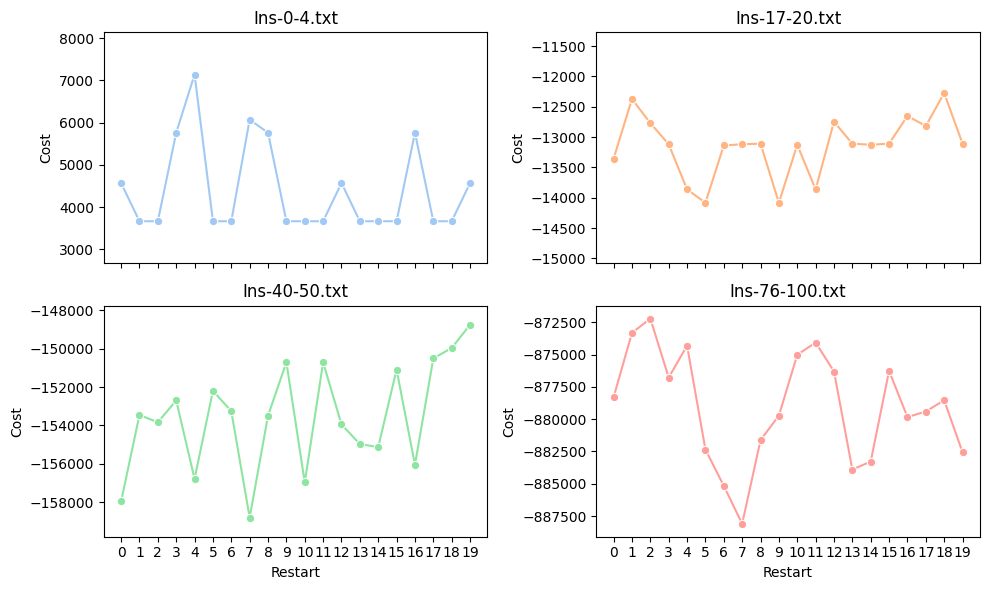

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axes = axes.flatten()

instances = dataframe_test_perf["instance_id"].unique()
dataframe_test_perf_acostd = dataframe_test_perf[dataframe_test_perf["algorithm"]=='ACO STD']
colors = sns.color_palette("pastel", len(instances))

for i, instance in enumerate(instances):
    ax = axes[i]
    data = dataframe_test_perf_acostd[dataframe_test_perf_acostd["instance_id"] == instance]
    sns.lineplot(data=data, x="restart", y="cost", marker="o", color=colors[i], ax=ax, errorbar=None)
    ax.set_xticks(range(data["restart"].min(), data["restart"].max() + 1, 1)) 
    ax.set_title(instance)
    ax.set_xlabel("Restart")
    ax.set_ylabel("Cost")
    ax.set_ylim(data["cost"].min() - 1000, data["cost"].max() + 1000)


plt.tight_layout()


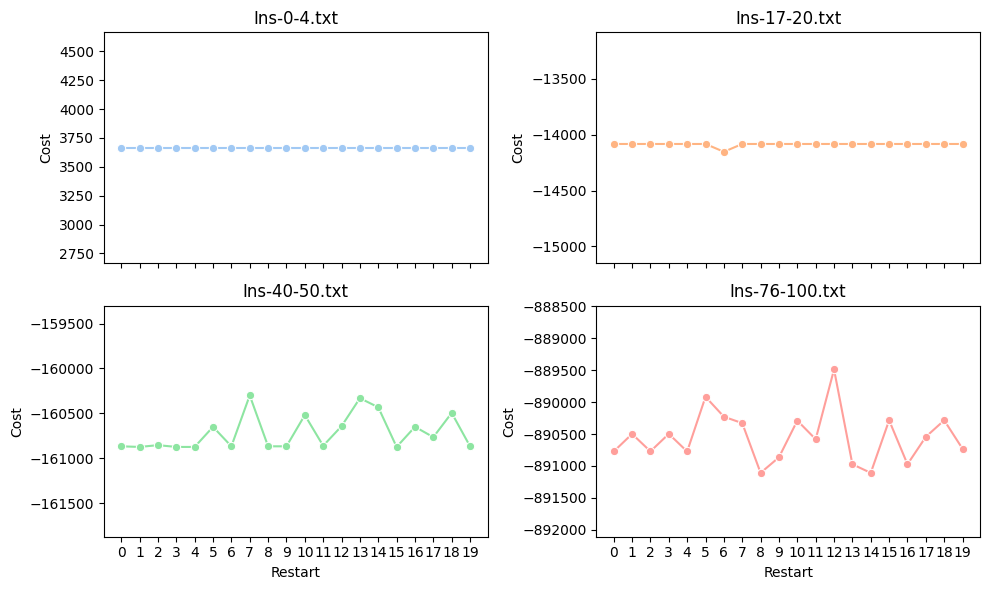

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axes = axes.flatten()

instances = dataframe_test_perf["instance_id"].unique()
dataframe_test_perf_acostd = dataframe_test_perf[dataframe_test_perf["algorithm"]=='ACO MAXMIN']
colors = sns.color_palette("pastel", len(instances))

for i, instance in enumerate(instances):
    ax = axes[i]
    data = dataframe_test_perf_acostd[dataframe_test_perf_acostd["instance_id"] == instance]
    sns.lineplot(data=data, x="restart", y="cost", marker="o", color=colors[i], ax=ax, errorbar=None)
    ax.set_xticks(range(data["restart"].min(), data["restart"].max() + 1, 1)) 
    ax.set_title(instance)
    ax.set_xlabel("Restart")
    ax.set_ylabel("Cost")
    ax.set_ylim(data["cost"].min() - 1000, data["cost"].max() + 1000)


plt.tight_layout()


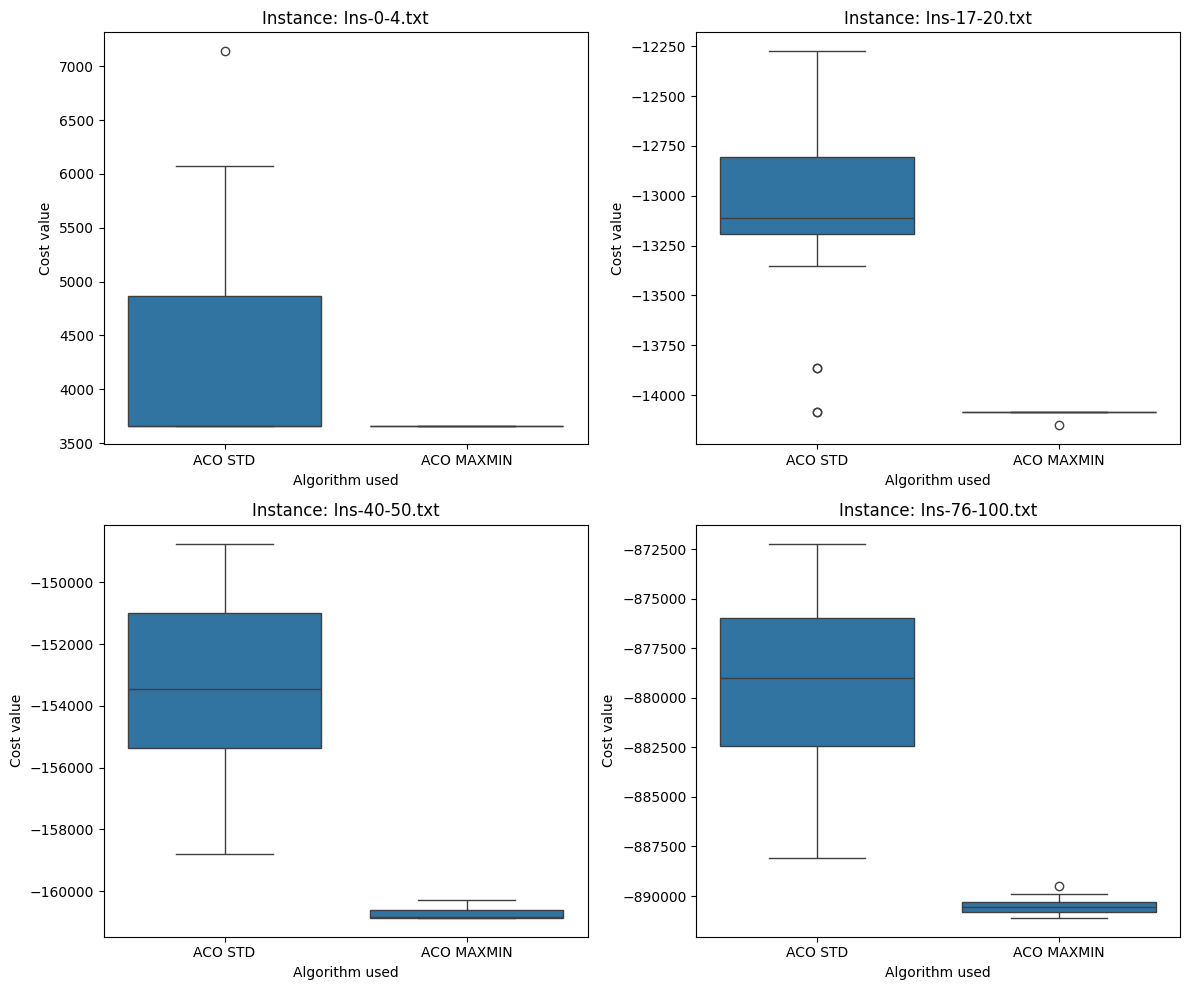

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for ax, instance in zip(axes, files_test_perf):

    # Filter data for the current instance
    dataframe_instance = dataframe_test_perf[dataframe_test_perf['instance_id'] == instance]
    sns.boxplot(x='algorithm', y='cost', data=dataframe_instance, ax=ax)
    
    ax.set_title(f'Instance: {instance}')
    ax.set_xlabel('Algorithm used')
    ax.set_ylabel('Cost value')

plt.tight_layout()
plt.show()


### Implementation of MAXMIN/H ACO model with new heuristic

In [33]:
print("==============================================================")

aco_maxminH = ACO_gespp(graph,
              num_ants=60,
              num_iterations=300,
              alpha=2,
              beta=3,
              evaporation_rate=0.1,
              Q=100,
              maxmin_init_cost=5000,
              tau_min_scaler=10,
              use_maxmin=True, heuristic_type="ProfitCost", profit_gamma=0.1, profit_epsilon=1.0)

aco_path_maxminH, aco_cost_maxminH, aco_arc_cost_maxminH, aco_total_profit_maxminH, aco_clusters_coverage_maxminH, aco_progress_maxminH = aco_maxminH.run()


print("ACO MAXMIN H-PROFIT Path:", aco_path_maxminH)
print("ACO MAXMIN H-PROFIT Objective function:", aco_cost_maxminH)

print("\n#### ACO MAXMIN H-PROFIT Solution details ####")
print("\nSelected arcs in the solution:")

print(f"ACO MAXMIN H-PROFIT Path cost (only arcs): {aco_arc_cost_maxminH}")  
print(f"ACO MAXMIN H-PROFIT Clusters profit recovered: {aco_total_profit_maxminH}")
print(f"ACO MAXMIN H-PROFIT Clusters usage: {aco_clusters_coverage_maxminH}%")


ACO MAXMIN H-PROFIT Path: ['1', '4', '6']
ACO MAXMIN H-PROFIT Objective function: -2475

#### ACO MAXMIN H-PROFIT Solution details ####

Selected arcs in the solution:
ACO MAXMIN H-PROFIT Path cost (only arcs): 7885
ACO MAXMIN H-PROFIT Clusters profit recovered: 10360
ACO MAXMIN H-PROFIT Clusters usage: 66.67%


### Implementation of MAXMIN ACO model with local search

In [34]:

print("==============================================================")

aco_maxmin_localSearch = ACO_gespp(graph,
              num_ants=60,
              num_iterations=100,
              alpha=2,
              beta=3,
              evaporation_rate=0.1,
              Q=100,
              maxmin_init_cost=5000,
              tau_min_scaler=10,
              use_maxmin=True)

aco_path_maxmin_LS, aco_cost_maxmin_LS, aco_arc_cost_maxmin_LS, aco_total_profit_maxmin_LS, aco_clusters_coverage_maxmin_LS, aco_progress_maxmin_LS = aco_maxmin_localSearch.run()

aco_path_maxmin_LS2, aco_cost_maxmin_LS2, aco_clusters_coverage_maxmin_LS  = aco_maxmin_localSearch.local_search_3opt(aco_path_maxmin_LS, aco_cost_maxmin_LS)


print("ACO MAXMIN Path:", aco_path_maxmin_LS)
print("ACO MAXMIN Objective function:", aco_cost_maxmin_LS)

print(aco_cost_maxmin_LS2, aco_clusters_coverage_maxmin_LS)

print("\n#### ACO MAXMIN Solution details ####")
print("\nSelected arcs in the solution:")

print(f"ACO MAXMIN Path cost (only arcs): {aco_arc_cost_maxmin_LS}")  
print(f"ACO MAXMIN Clusters profit recovered: {aco_total_profit_maxmin_LS}")
print(f"ACO MAXMIN Clusters usage: {aco_clusters_coverage_maxmin_LS}%")


ACO MAXMIN Path: ['1', '4', '6']
ACO MAXMIN Objective function: -2475
-2475 66.67

#### ACO MAXMIN Solution details ####

Selected arcs in the solution:
ACO MAXMIN Path cost (only arcs): 7885
ACO MAXMIN Clusters profit recovered: 10360
ACO MAXMIN Clusters usage: 66.67%


## Results of ACO algorithm

In [ ]:
# from datetime import datetime

# # Getting the current date and time
# dt = datetime.now()
# # List all instance files (for example, with extension .txt)
# instance_files = [os.path.join("instances", filename) for filename in os.listdir("instances") if filename.endswith(".txt")]

# # Prepare a list to collect results for summary.
# results = []


# for instance_file in instance_files:
#     print(f"\nProcessing instance: {instance_file}")
#     print(f"Reading Graph {datetime.now()}")
#     # Create and load the graph for the instance.
#     graph = Graph()
#     nodes_number, clusters_number, padding = graph.load_graph_data(instance_file)
    
#     print(f"IP_BOUND {datetime.now()}")
#     # Compute Ip lower bound
#     ip_status, ip_cost, ip_path_arcs, ip_total_arc_cost, ip_total_profit, ip_visited_clusters, clusters_coverage = MIP_gespp(graph)

#     print(f"ACO_STD {datetime.now()}")
#     # Compute ACO std
#     aco = ACO_gespp(graph, num_ants=60, num_iterations=100,
#                     alpha=2, beta=3, evaporation_rate=0.1, Q=100,
#                     maxmin_init_cost=5000,
#                     tau_min_scaler=10,
#                     use_maxmin=False)
#     aco_path_std, aco_cost_std, aco_arc_cost_std, aco_total_profit_std, aco_clusters_coverage_std, aco_progress_std = aco.run()
#     gap_std = (aco_cost_std - ip_cost) / abs(ip_cost) * 100

#     # Append results
#     results.append((instance_file,"ACO Std", aco_cost_std, aco_clusters_coverage_std, ip_cost, gap_std))


#     print(f"ACO_MAXMIN {datetime.now()}") 
#     # Compute ACO MAXMIN
#     aco_maxmin = ACO_gespp(graph, num_ants=60, num_iterations=100,
#                     alpha=2, beta=3, evaporation_rate=0.1, Q=100,
#                     maxmin_init_cost=5000,
#                     tau_min_scaler=10,
#                     use_maxmin=True)  
#     aco_path_maxmin, aco_cost_maxmin, aco_arc_cost_maxmin, aco_total_profit_maxmin, aco_clusters_coverage_maxmin, aco_progress_maxmin = aco_maxmin.run()
    
#     gap_maxmin = (aco_cost_maxmin - ip_cost) / abs(ip_cost) * 100
#     # Append results
#     results.append((instance_file,"ACO MAXMIN", aco_cost_maxmin, aco_clusters_coverage_maxmin, ip_cost, gap_maxmin))

#     aco_path_maxmin_LS, aco_cost_maxmin_LS, aco_clusters_coverage_maxmin_LS  = aco_maxmin.local_search_3opt(aco_path_maxmin, aco_cost_maxmin)

#     gap_maxmin_LS = (aco_cost_maxmin_LS - ip_cost) / abs(ip_cost) * 100

#     results.append((instance_file,"ACO MAXMIN LS", aco_cost_maxmin_LS, aco_clusters_coverage_maxmin_LS, ip_cost, gap_maxmin_LS))

#     print(f"ACO_MAXMIN_H-PROFIT {datetime.now()}")
#     # Compute ACO MAXMIN with Heuristic Profit
#     aco_maxminHProfit = ACO_gespp(graph, num_ants=60,num_iterations=100,
#                 alpha=2, beta=3, evaporation_rate=0.1, Q=100,
#                 maxmin_init_cost=5000,
#                 tau_min_scaler=10,
#                 use_maxmin=True, heuristic_type="ProfitCost", profit_gamma=1, profit_epsilon=1.0)
#     aco_path_maxminHProfit, aco_cost_maxminHProfit, aco_arc_cost_maxminHProfit, aco_total_profit_maxminHProfit, aco_clusters_coverage_maxminHProfit, aco_progress_maxminHProfit = aco_maxminHProfit.run()

#     gap_maxminHProfit = (aco_cost_maxminHProfit - ip_cost) / abs(ip_cost) * 100
#     # Append results
#     results.append((instance_file,"ACO MAXMIN H-PROFIT", aco_cost_maxminHProfit, aco_clusters_coverage_maxminHProfit, ip_cost, gap_maxminHProfit))
    
#     aco_path_maxminHProfit_LS, aco_cost_maxminHProfit_LS, aco_clusters_coverage_maxminHProfit_LS  = aco_maxminHProfit.local_search_3opt(aco_path_maxminHProfit, aco_cost_maxminHProfit)

#     gap_maxminHProfit_LS = (aco_cost_maxminHProfit_LS - ip_cost) / abs(ip_cost) * 100

#     results.append((instance_file,"ACO MAXMIN H-PROFIT LS", aco_cost_maxminHProfit_LS, aco_clusters_coverage_maxminHProfit_LS, ip_cost, gap_maxminHProfit_LS))



# aco_vs_lb = pd.DataFrame(results, columns =['File', 'Type', 'ACO Cost', 'ACO Cluster Coverage', 'LB Cost', 'Gap'])





Processing instance: instances\Ins-0-20.txt
Reading Graph 2025-03-10 19:11:42.446510
IP_BOUND 2025-03-10 19:11:42.456857
ACO_STD 2025-03-10 19:11:42.617996
ACO_MAXMIN 2025-03-10 19:11:43.274368
ACO_MAXMIN_H-PROFIT 2025-03-10 19:11:43.828937

Processing instance: instances\Ins-0-4.txt
Reading Graph 2025-03-10 19:11:44.388373
IP_BOUND 2025-03-10 19:11:44.389172
ACO_STD 2025-03-10 19:11:44.417990
ACO_MAXMIN 2025-03-10 19:11:44.520638
ACO_MAXMIN_H-PROFIT 2025-03-10 19:11:44.605200

Processing instance: instances\Ins-1-20.txt
Reading Graph 2025-03-10 19:11:44.699349
IP_BOUND 2025-03-10 19:11:44.708245
ACO_STD 2025-03-10 19:11:45.067148
ACO_MAXMIN 2025-03-10 19:11:45.707060
ACO_MAXMIN_H-PROFIT 2025-03-10 19:11:46.459902

Processing instance: instances\Ins-10-20.txt
Reading Graph 2025-03-10 19:11:47.275854
IP_BOUND 2025-03-10 19:11:47.284316
ACO_STD 2025-03-10 19:11:47.458962
ACO_MAXMIN 2025-03-10 19:11:47.922375
ACO_MAXMIN_H-PROFIT 2025-03-10 19:11:48.560743

Processing instance: instances\

,File,Type,ACO Cost,ACO Cluster Coverage,LB Cost,Gap
0,instances\Ins-0-20.txt,ACO Std,-13473,100.00,-13851.0,2.729045
1,instances\Ins-0-20.txt,ACO MAXMIN,-13617,95.83,-13851.0,1.689409
2,instances\Ins-0-20.txt,ACO MAXMIN LS,-13617,95.83,-13851.0,1.689409
3,instances\Ins-0-20.txt,ACO MAXMIN H-PROFIT,-13617,95.83,-13851.0,1.689409
4,instances\Ins-0-20.txt,ACO MAXMIN H-PROFIT LS,-13617,95.83,-13851.0,1.689409
...,...,...,...,...,...,...
500,instances\Ins-99-100.txt,ACO Std,-570605,100.00,-573362.0,0.480848
501,instances\Ins-99-100.txt,ACO MAXMIN,-570730,100.00,-573362.0,0.459047
502,instances\Ins-99-100.txt,ACO MAXMIN LS,-570730,100.00,-573362.0,0.459047
503,instances\Ins-99-100.txt,ACO MAXMIN H-PROFIT,-571420,100.00,-573362.0,0.338704


Type
ACO MAXMIN                1.787389
ACO MAXMIN H-PROFIT       1.815923
ACO MAXMIN H-PROFIT LS    1.810285
ACO MAXMIN LS             1.777203
ACO Std                   3.217127
Name: Gap, dtype: float64

In [6]:
aco_vs_lb = pd.read_excel("aco_vs_lb_MODfinaltest.xlsx")

In [7]:
average_gap_per_type = aco_vs_lb.groupby(["Type","Size"])["Gap"].mean()

display(aco_vs_lb)
display(average_gap_per_type)


,Unnamed: 0.1,Unnamed: 0,File,Size,Type,ACO Cost,ACO Cluster Coverage,LB Cost,Gap
0,0,0,instances\Ins-0-20.txt,20,ACO Std,-13473,100.00,-13851,2.729045
1,1,1,instances\Ins-0-20.txt,20,ACO MAXMIN,-13617,95.83,-13851,1.689409
2,2,2,instances\Ins-0-20.txt,20,ACO MAXMIN LS,-13617,95.83,-13851,1.689409
3,3,3,instances\Ins-0-20.txt,20,ACO MAXMIN H-PROFIT,-13617,95.83,-13851,1.689409
4,4,4,instances\Ins-0-20.txt,20,ACO MAXMIN H-PROFIT LS,-13617,95.83,-13851,1.689409
...,...,...,...,...,...,...,...,...,...
495,500,500,instances\Ins-99-100.txt,10,ACO Std,-570605,100.00,-573362,0.480848
496,501,501,instances\Ins-99-100.txt,10,ACO MAXMIN,-570730,100.00,-573362,0.459047
497,502,502,instances\Ins-99-100.txt,10,ACO MAXMIN LS,-570730,100.00,-573362,0.459047
498,503,503,instances\Ins-99-100.txt,10,ACO MAXMIN H-PROFIT,-571420,100.00,-573362,0.338704


Type                    Size
ACO MAXMIN              10       0.223471
                        20       6.448510
                        50       1.346083
ACO MAXMIN H-PROFIT     10       0.214359
                        20       6.675522
                        50       1.305994
ACO MAXMIN H-PROFIT LS  10       0.211798
                        20       6.673365
                        50       1.292720
ACO MAXMIN LS           10       0.221922
                        20       6.446352
                        50       1.315811
ACO Std                 10       0.808504
                        20      10.190206
                        50       2.690017
Name: Gap, dtype: float64